In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [33]:
xom_data = pd.read_csv("XOM.csv")
xom_data = xom_data[::-1]
xom_data = xom_data[0:300]
xom_data = xom_data[['Дата', 'Цена']]
xom_data['Дата'] = pd.to_datetime(xom_data['Дата'])
xom_data['Timestamp'] = xom_data['Дата'].astype('int64') // 10**9  # преобразуем в timestamp (секунды с начала эпохи)
xom_data['Timestamp'] = xom_data['Timestamp'].astype('int32')
xom_data['Цена'] = xom_data['Цена'].str.replace(',', '.').astype(float)
c1 = xom_data['Цена'].mean()
xom_data['Цена'] = xom_data['Цена'] / c1
xom_data

,Дата,Цена,Timestamp
607,2021-01-20,0.795992,1611100800
606,2021-01-21,0.773171,1611187200
605,2021-01-22,0.762243,1611273600
604,2021-01-25,0.753726,1611532800
603,2021-01-26,0.737173,1611619200
...,...,...,...
312,2022-03-22,1.315243,1647907200
311,2022-03-23,1.335975,1647993600
310,2022-03-24,1.339992,1648080000
309,2022-03-25,1.369241,1648166400


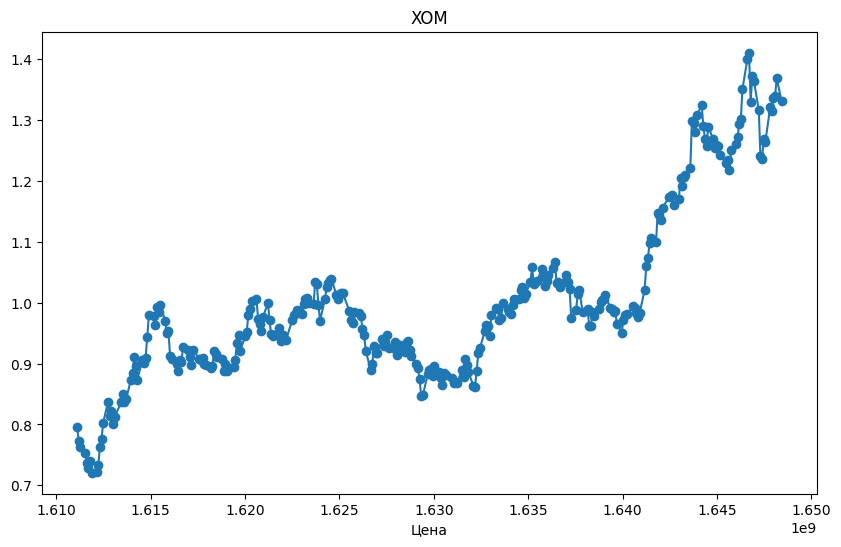

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(xom_data['Timestamp'], xom_data['Цена'], label='Временной ряд XOM', marker='o')
plt.xlabel('Timestamp')
plt.xlabel('Цена')
plt.title('XOM')
plt.show()

In [35]:
brent_data = pd.read_csv("Brent_F.csv")
brent_data = brent_data[::-1]
brent_data = brent_data[0:300]
brent_data = brent_data[['Дата', 'Цена']]
brent_data['Дата'] = brent_data['Дата'].str.replace('.', '-')
brent_data['Дата'] = pd.to_datetime(brent_data['Дата'], dayfirst=True)
brent_data['Timestamp'] = brent_data['Дата'].astype('int64') // 10**9  # преобразуем в timestamp (секунды с начала эпохи)
brent_data['Timestamp'] = brent_data['Timestamp'].astype('int32')
brent_data['Цена'] = brent_data['Цена'].str.replace(',', '.').astype(float)
c2 = brent_data['Цена'].mean()
brent_data['Цена'] = brent_data['Цена'] / c2
brent_data

,Дата,Цена,Timestamp
636,2021-01-04,0.694960,1609718400
635,2021-01-05,0.729102,1609804800
634,2021-01-06,0.738624,1609891200
633,2021-01-07,0.739712,1609977600
632,2021-01-08,0.761613,1610064000
...,...,...,...
341,2022-02-22,1.317281,1645488000
340,2022-02-23,1.317281,1645574400
339,2022-02-24,1.347751,1645660800
338,2022-02-25,1.332108,1645747200


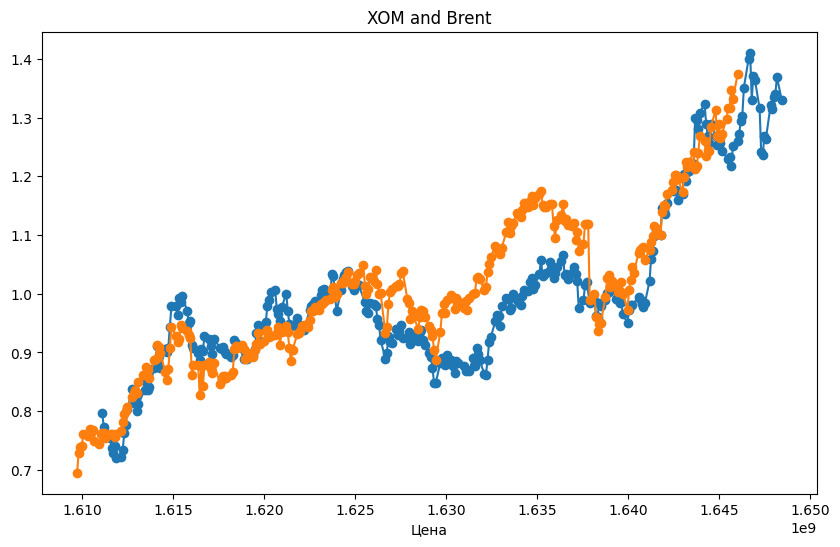

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(xom_data['Timestamp'], xom_data['Цена'], label='Временной ряд XOM', marker='o')
plt.plot(brent_data['Timestamp'], brent_data['Цена'], label='Временной ряд XOM', marker='o')
plt.xlabel('Timestamp')
plt.xlabel('Цена')
plt.title('XOM and Brent')
plt.show()

In [37]:
df_merge = pd.merge(brent_data, xom_data, on='Дата', how='inner') 
correlation_coefficient = df_merge['Цена_x'].corr(df_merge['Цена_y'])
print(correlation_coefficient)

0.8850324332827451


In [38]:
df = df_merge
df = df.drop(['Дата', 'Timestamp_x', 'Timestamp_y'], axis=1)
df['lag_1'] = df['Цена_x'].shift(1)
df['lag_3'] = df['Цена_x'].shift(3)
df['rolling_mean'] = df['Цена_x'].rolling(window=3).mean()
df = df.fillna(df.median())
y = df['Цена_y'].values
df = df.drop(['Цена_y'], axis=1)
X = df

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Обучаем модель на данных
model.fit(X, y)

print(f'Коэффициент наклона (slope): {model.coef_}')
print(f'Свободный член (intercept): {model.intercept_}')
X

Коэффициент наклона (slope): [ 0.70995786  0.09042498  0.0900423  -0.07192166]
Свободный член (intercept): 0.15145486628223837


,Цена_x,lag_1,lag_3,rolling_mean
0,0.762837,0.994082,0.994082,0.996553
1,0.763109,0.762837,0.994082,0.996553
2,0.753723,0.763109,0.994082,0.759890
3,0.760116,0.753723,0.762837,0.758983
4,0.760524,0.760116,0.763109,0.758121
...,...,...,...,...
275,1.317281,1.272392,1.289668,1.284771
276,1.317281,1.317281,1.264639,1.302318
277,1.347751,1.317281,1.272392,1.327438
278,1.332108,1.347751,1.317281,1.332380


In [39]:
xom_data = pd.read_csv("XOM.csv")
xom_data = xom_data[::-1]
xom_data = xom_data[301:400]
xom_data = xom_data[['Дата', 'Цена']]
xom_data['Дата'] = pd.to_datetime(xom_data['Дата'])
xom_data['Timestamp'] = xom_data['Дата'].astype('int64') // 10**9  # преобразуем в timestamp (секунды с начала эпохи)
xom_data['Timestamp'] = xom_data['Timestamp'].astype('int32')
xom_data['Цена'] = xom_data['Цена'].str.replace(',', '.').astype(float)
xom_data['Цена'] = xom_data['Цена'] / c1
y_test = xom_data['Цена']

In [40]:
brent_data = pd.read_csv("Brent_F.csv")
brent_data = brent_data[::-1]
brent_data = brent_data[301:400]
brent_data = brent_data[['Дата', 'Цена']]
brent_data['Дата'] = brent_data['Дата'].str.replace('.', '-')
brent_data['Дата'] = pd.to_datetime(brent_data['Дата'], dayfirst=True)
brent_data['Timestamp'] = brent_data['Дата'].astype('int64') // 10**9  # преобразуем в timestamp (секунды с начала эпохи)
brent_data['Timestamp'] = brent_data['Timestamp'].astype('int32')
brent_data['Цена'] = brent_data['Цена'].str.replace(',', '.').astype(float)
brent_data['Цена_x'] = brent_data['Цена'] / c2


brent_data['lag_1'] = brent_data['Цена_x'].shift(1)
brent_data['lag_3'] = brent_data['Цена_x'].shift(3)
brent_data['rolling_mean'] = brent_data['Цена_x'].rolling(window=3).mean()
brent_data = brent_data.fillna(brent_data.median())
X_test = brent_data[['Цена_x', 'lag_1', 'lag_3', 'rolling_mean']]
X_test

,Цена_x,lag_1,lag_3,rolling_mean
335,1.536148,1.517920,1.518940,1.510983
334,1.502549,1.536148,1.518940,1.510983
333,1.606609,1.502549,1.518940,1.548435
332,1.675983,1.606609,1.536148,1.595047
331,1.740868,1.675983,1.502549,1.674487
...,...,...,...,...
241,1.354416,1.353328,1.455756,1.388196
240,1.348023,1.354416,1.456844,1.351922
239,1.376044,1.348023,1.353328,1.359495
238,1.445554,1.376044,1.354416,1.389874


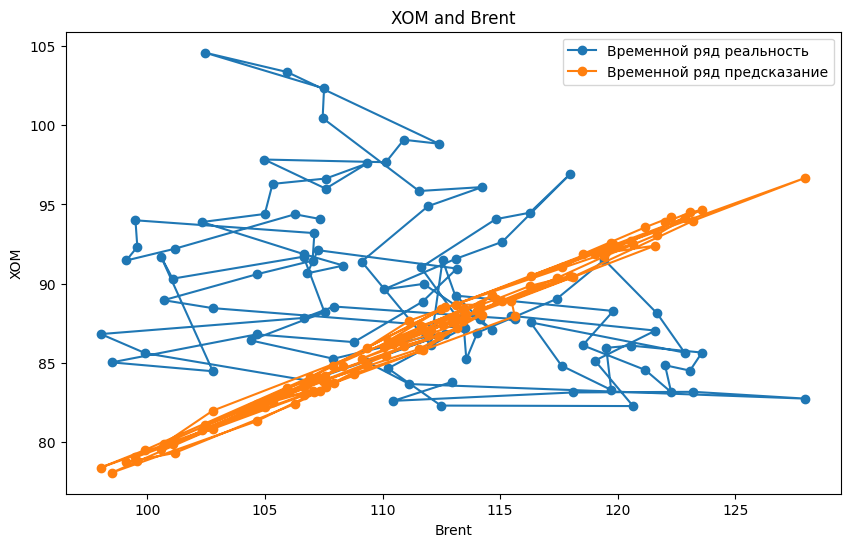

In [41]:
y_res = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test['Цена_x'] * c2, y_test * c1, label='Временной ряд реальность', marker='o')
plt.plot(X_test['Цена_x'] * c2, y_res * c1, label='Временной ряд предсказание', marker='o')
plt.xlabel('Brent')
plt.ylabel('XOM')
plt.title('XOM and Brent')
plt.legend()
plt.show()

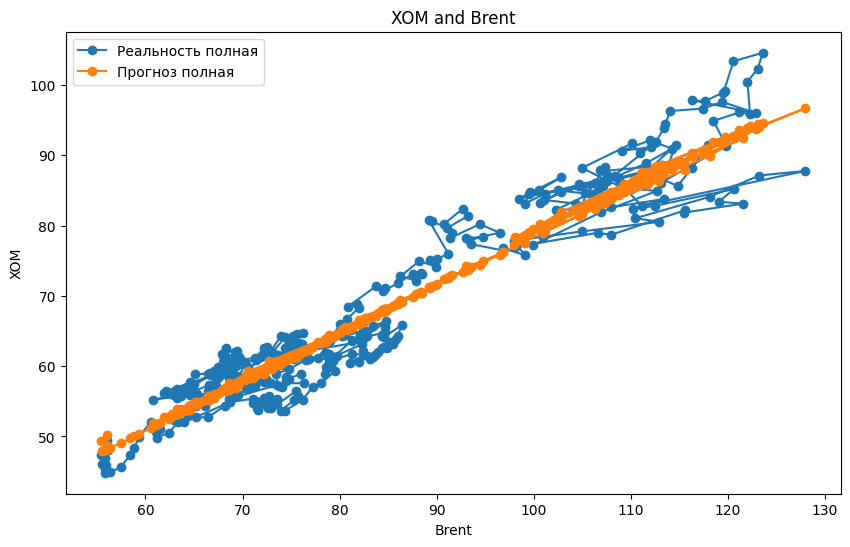

In [42]:
xom_data = pd.read_csv("XOM.csv")
xom_data = xom_data[::-1]
xom_data = xom_data[0:400]
xom_data = xom_data[['Дата', 'Цена']]
xom_data['Дата'] = pd.to_datetime(xom_data['Дата'])
xom_data['Timestamp'] = xom_data['Дата'].astype('int64') // 10**9  # преобразуем в timestamp (секунды с начала эпохи)
xom_data['Timestamp'] = xom_data['Timestamp'].astype('int32')
xom_data['Цена'] = xom_data['Цена'].str.replace(',', '.').astype(float)
xom_data['Цена'] = xom_data['Цена'] / c1

brent_data = pd.read_csv("Brent_F.csv")
brent_data = brent_data[::-1]
brent_data = brent_data[0:400]
brent_data = brent_data[['Дата', 'Цена']]
brent_data['Дата'] = brent_data['Дата'].str.replace('.', '-')
brent_data['Дата'] = pd.to_datetime(brent_data['Дата'], dayfirst=True)
brent_data['Timestamp'] = brent_data['Дата'].astype('int64') // 10**9  # преобразуем в timestamp (секунды с начала эпохи)
brent_data['Timestamp'] = brent_data['Timestamp'].astype('int32')
brent_data['Цена'] = brent_data['Цена'].str.replace(',', '.').astype(float)
brent_data['Цена'] = brent_data['Цена'] / c2

df_merge = pd.merge(brent_data, xom_data, on='Дата', how='inner')


df_merge['lag_1'] = df_merge['Цена_x'].shift(1)
df_merge['lag_3'] = df_merge['Цена_x'].shift(3)
df_merge['rolling_mean'] = df_merge['Цена_x'].rolling(window=3).mean()
df_merge = df_merge.fillna(df_merge.median())
X_test = df_merge[['Цена_x', 'lag_1', 'lag_3', 'rolling_mean']]
ans = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(df_merge['Цена_x'] * c2, df_merge['Цена_y'] * c1, label='Реальность полная', marker='o')
plt.plot(df_merge['Цена_x'] * c2, ans * c1, label='Прогноз полная', marker='o')
plt.xlabel('Brent')
plt.ylabel('XOM')
plt.title('XOM and Brent')
plt.legend()
plt.show()

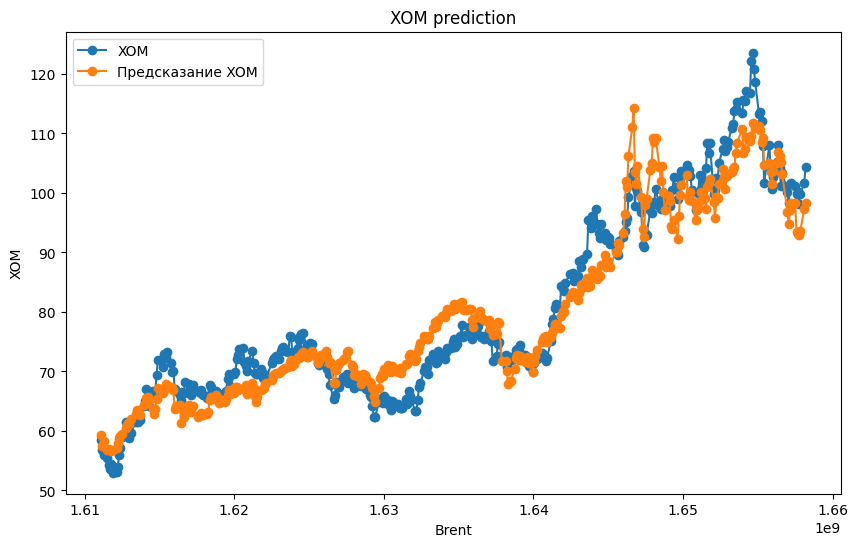

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(df_merge['Timestamp_x'], df_merge['Цена_y'] * c2, label='XOM', marker='o')
plt.plot(df_merge['Timestamp_x'], ans * c2, label='Предсказание XOM', marker='o')
plt.xlabel('Brent')
plt.ylabel('XOM')
plt.title('XOM prediction')
plt.legend()
plt.show()

In [44]:
xom_data = pd.read_csv("XOM.csv")
xom_data = xom_data[::-1]
xom_data = xom_data[0:300]
xom_data = xom_data[['Дата', 'Цена']]
xom_data['Дата'] = pd.to_datetime(xom_data['Дата'])
xom_data['Timestamp'] = xom_data['Дата'].astype('int64') // 10**9  # преобразуем в timestamp (секунды с начала эпохи)
xom_data['Timestamp'] = xom_data['Timestamp'].astype('int32')
xom_data['Цена'] = xom_data['Цена'].str.replace(',', '.').astype(float)
c1 = xom_data['Цена'].mean()
xom_data['Цена'] = xom_data['Цена'] / c1

w = []
corr = []
for width in range(10, 150):
    first_part = xom_data['Цена'][0:width]
    cors = []
    for i in range(1, int(len(xom_data['Цена']) / width)):
        if (i + 1) * width < int(len(xom_data['Цена'])):
            second_part = xom_data['Цена'][i * width : (i + 1) * width]
            cor_с = np.corrcoef(first_part, second_part)[0]
            cors.append(cor_с)

    w.append(width)
    corr.append(np.mean(cors))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


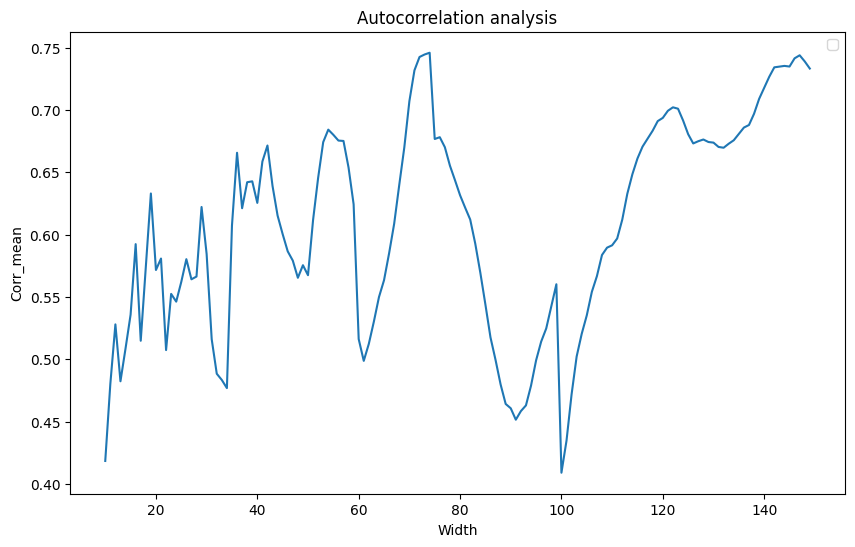

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(w, corr)
plt.xlabel('Width')
plt.ylabel('Corr_mean')
plt.title('Autocorrelation analysis')
plt.legend()
plt.show()

In [46]:
max_w = 0
max_corr = 0
for i in range(0, len(w)):
    if corr[i] > max_corr:
        max_corr = corr[i]
        max_w = w[i]

print(max_w, max_corr)


74 0.7459367564301496
